# Introduction to Dijkstra's Algorithm

## What is Dijkstra's Algorithm?

Dijkstra's algorithm is a popular algorithm used for finding the shortest paths between nodes in a graph. It was conceived by computer scientist Edsger W. Dijkstra in 1956 and published three years later. This algorithm finds the shortest path from a starting node to all other nodes in a weighted graph.

## Graphs in Dijkstra's Algorithm

To understand Dijkstra's algorithm, we need to understand the concept of graphs.

### Nodes and Edges

- **Nodes (Vertices):** Represent entities such as cities, routers, or intersections.
- **Edges:** Represent the paths or connections between nodes, with each edge having a weight or cost associated with it.

### Types of Graphs Used in Dijkstra's Algorithm

- **Directed and Undirected Graphs:** Dijkstra's algorithm can be applied to both directed and undirected graphs.
- **Weighted Graph:** Each edge in the graph must have a weight (non-negative) that represents the cost to traverse from one node to another.

## Key Concepts

### Shortest Path

The main goal of Dijkstra's algorithm is to determine the shortest path from a starting node to all other nodes in the graph. The shortest path is the path with the minimum total weight.

### Priority Queue

Dijkstra's algorithm uses a priority queue to efficiently select the next node with the smallest tentative distance.

### Tentative Distance

At each step, the algorithm maintains the shortest known distance from the starting node to each node in the graph. These distances are tentative because they may be updated as the algorithm processes each node.

## How Dijkstra's Algorithm Works

1. **Initialization:**
   - Set the distance to the starting node to 0 and the distance to all other nodes to infinity.
   - Mark all nodes as unvisited. Create a set of all unvisited nodes called the unvisited set.
   - Assign the starting node as the current node.

2. **Iteration:**
   - For the current node, consider all of its unvisited neighbors. Calculate their tentative distances through the current node.
   - Compare the newly calculated tentative distance to the current assigned value and assign the smaller one.
   - After considering all unvisited neighbors of the current node, mark the current node as visited. A visited node will not be checked again.

3. **Selection:**
   - Select the unvisited node that is marked with the smallest tentative distance and set it as the new current node.
   - Repeat the process until all nodes have been visited or the smallest tentative distance among the unvisited nodes is infinity.

## Visualize

![image.png](https://upload.wikimedia.org/wikipedia/commons/e/e4/DijkstraDemo.gif)

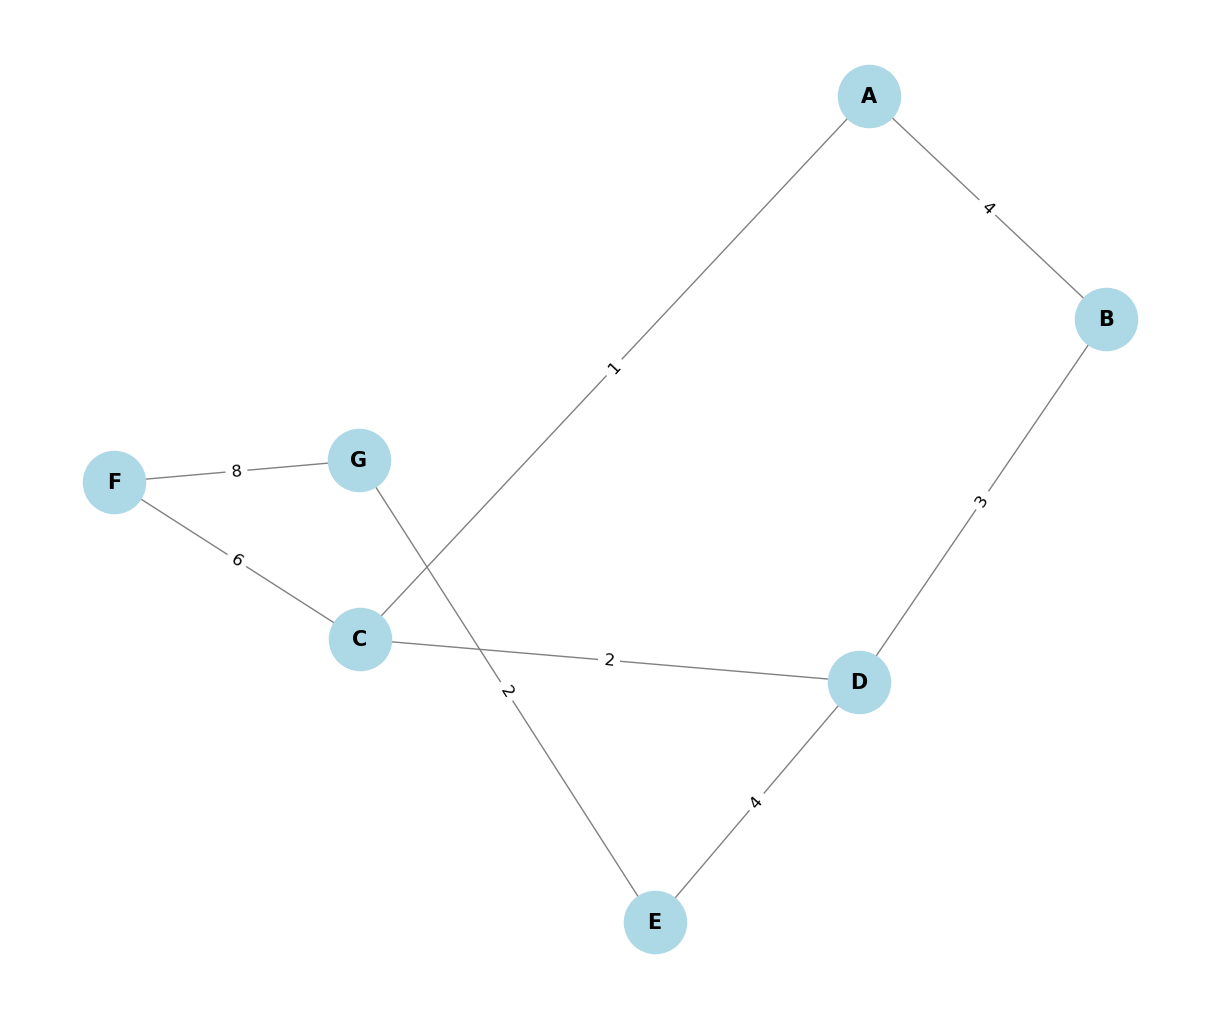

In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Create an undirected graph
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

# Add weighted edges
edges = [
    ('A', 'B', 4,),
    ('A', 'C', 1),
    ('B', 'D', 3),
    ('C', 'D', 2),
    ('C', 'F', 6),
    ('D', 'E', 4),
    ('E', 'G', 2),
    ('F', 'G', 8)
]
G.add_weighted_edges_from(edges)

# Define a function to draw the graph
def draw_graph(G, pos, edge_labels=None, node_color='lightblue', edge_color='gray', highlighted_edges=[]):
    plt.figure(figsize=(12, 10))  # Adjust figure size for better spacing
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color,
            node_size=2000, font_size=15, font_weight='bold', arrows=False)
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    if highlighted_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, edge_color='blue', width=2)
    plt.show()

# Get positions for the nodes using spring layout for better spacing
pos = nx.spring_layout(G)

# Draw the graph initially
draw_graph(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))


In [142]:
def dijkstra(start, target, edges):
    # Initialize the graph as an adjacency list
    graph = {}
    for edge in edges:
        source, destination, weight = edge[:3]
        if source not in graph:
            graph[source] = []
        graph[source].append((destination, weight))
    print("Initial Graph (Adjacency List):", graph)
    
    # Initialize distances dictionary with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    print("Initial Distances:", distances)
    
    # Predecessor dictionary to track the path
    predecessors = {node: None for node in graph}
    print("Initial Predecessors:", predecessors)
    
    # Priority queue to store (distance, node) tuples
    priority_queue = [(0, start)]
    print("Initial Priority Queue:", priority_queue)
    
    count_while = 1

    while priority_queue:
        print(f"\n------ Iteration {count_while} ------\n")
        
        # Extract the node with the smallest known distance from the priority queue
        current_distance, current_node = min(priority_queue)
        print("Current Node:", current_node)
        print("Current Distance:", current_distance)
        
        # Remove the current node from the priority queue
        priority_queue.remove((current_distance, current_node))
        print("Priority Queue after removing current node:", priority_queue)
        
        # If we reached the target node, print the path and return
        if current_node == target:
            print(f"\n------ current_node ({current_node}) is == to the taget ({target}) ------\n")
            path = []
            count_target_while = 1
            print("Priority Queue", priority_queue)
            print("Predecessors:", predecessors)
            while current_node is not None:
                print(f"\n------ Backtracking for Path (Target Iteration {count_target_while}) ------\n")
                path.append(current_node)
                current_node = predecessors[current_node]
                print("Current Node in Path:", current_node)
                count_target_while += 1
            path.reverse()
            print(f"Shortest Path from {start} to {target}: {' -> '.join(path)}")
            print(f"Total Distance: {current_distance}")
            return
        
        # Explore neighbors of the current node
        count_for = 1
        for neighbor, weight in graph.get(current_node, []):
            print(f"\n------ Neighbor {neighbor} from current node {current_node} (Iteration {count_for}) ------\n")
            print("Neighbor:", neighbor)
            print("Edge Weight to Neighbor:", weight)
            
            # Calculate the distance to the neighbor through the current node
            distance = current_distance + weight
            print("Distance from Start to Neighbor via Current Node:", distance)
            print("Current Distance to Neighbor:", distances.get(neighbor, float('inf')))
            
            # Update the shortest distance to the neighbor if a shorter path is found
            if distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                priority_queue.append((distance, neighbor))
                print("Updated Distance to Neighbor:", distances[neighbor])
                print("Updated Predecessors:", predecessors)
                print("Updated Priority Queue:", priority_queue)
            
            count_for += 1
        
        count_while += 1
    
    # If we finish the while loop without reaching the target
    print(f"Cannot reach target node {target}")

# Call Dijkstra's algorithm function
start_node = 'A'
target_node = 'G'
dijkstra(start_node, target_node, edges)


Initial Graph (Adjacency List): {'A': [('B', 4), ('C', 1)], 'B': [('D', 3)], 'C': [('D', 2), ('F', 6)], 'D': [('E', 4)], 'E': [('G', 2)], 'F': [('G', 8)]}
Initial Distances: {'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}
Initial Predecessors: {'A': None, 'B': None, 'C': None, 'D': None, 'E': None, 'F': None}
Initial Priority Queue: [(0, 'A')]

------ Iteration 1 ------

Current Node: A
Current Distance: 0
Priority Queue after removing current node: []

------ Neighbor B from current node A (Iteration 1) ------

Neighbor: B
Edge Weight to Neighbor: 4
Distance from Start to Neighbor via Current Node: 4
Current Distance to Neighbor: inf
Updated Distance to Neighbor: 4
Updated Predecessors: {'A': None, 'B': 'A', 'C': None, 'D': None, 'E': None, 'F': None}
Updated Priority Queue: [(4, 'B')]

------ Neighbor C from current node A (Iteration 2) ------

Neighbor: C
Edge Weight to Neighbor: 1
Distance from Start to Neighbor via Current Node: 1
Current Distance to Neighbor: inf
Updat